In [29]:
%pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\OmotayoWaheed\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


In [30]:
# import africa food production datasets
africa_prod = pd.read_csv(r"C:\Users\OmotayoWaheed\OneDrive - Trium Limited\Desktop\Hamo\Africa Food Production.csv")
africa_prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


### Data Exploration

In [123]:
africa_prod.shape

(23110, 4)

In [122]:
africa_prod.columns # display the columns present in the datasets

Index(['Country', 'Item', 'Year', 'Value'], dtype='object')

In [32]:
africa_prod.info() # getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [34]:
africa_prod.describe()  # Describing the data

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [35]:
print(africa_prod.duplicated().sum()) # Check for duplicates

0


#### There are no duplicate values in the dataset

In [88]:
africa_prod['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

#### N.B There are a total of 45 African countries producing at least one item

### Q. What is the most produced Item in all the 45 african states

In [81]:
n = 20
africa_prod['Item'].value_counts()[:n].index.tolist()

['Milk - Excluding Butter',
 'Offals, Edible',
 'Fruits, Other',
 'Fats, Animals, Raw',
 'Bovine Meat',
 'Vegetables, Other',
 'Mutton & Goat Meat',
 'Poultry Meat',
 'Eggs',
 'Maize and products',
 'Pigmeat',
 'Freshwater Fish',
 'Beer',
 'Groundnuts (Shelled Eq)',
 'Meat, Other',
 'Rice (Milled Equivalent)',
 'Pulses, Other and products',
 'Sorghum and products',
 'Sugar cane',
 'Crustaceans']

In [92]:
# The country that produced more milk- excluding butter
milk_ex_butter = africa_prod.loc[(africa_prod['Item']=='Milk - Excluding Butter') & (africa_prod['Year'])].sort_values(by = 'Value', ascending=False)
most_milk_producing = milk_ex_butter.groupby('Country')['Value'].sum().sort_values(ascending=False).head()
most_milk_producing

Country
Sudan           35400
Egypt           27666
Kenya           22782
Ethiopia        16288
South Africa    15557
Name: Value, dtype: int64

#### Result: It has been shown that Sudan is the most milk - Excluding butter Producer between the year 2004 and 2013

In [105]:
item_qty = africa_prod.groupby('Item')['Country'].agg(['nunique']).reset_index().sort_values(by ='nunique', ascending=False)
item_qty.head(8)

,Item,nunique
49,"Offals, Edible",45
32,"Fruits, Other",45
90,"Vegetables, Other",45
28,"Fats, Animals, Raw",45
43,Milk - Excluding Butter,45
46,Mutton & Goat Meat,45
10,Bovine Meat,45
27,Eggs,44


#### N.B All items were not produced by all the 45 countries. 
 The items produced across all countries include
####                        1. Offals, Edible	
####                        2. Fruits, Other	
####                        3. Vegetables, Other	
####                        4. Fats, Animals, Raw	
####                        5. Milk - Excluding Butter	
####                        6. Mutton & Goat Meat	
####                        7. Bovine Meat	

#### Q. Which country produced the highest amount of oats in 2010?

In [37]:
oats_highest = africa_prod.loc[(africa_prod['Item']=='Oats') & (africa_prod['Year']==2010)].sort_values(by = 'Value', ascending=False)
oats_highest

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
9286,Kenya,Oats,2010,3
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1
7746,Ghana,Oats,2010,0
10026,Lesotho,Oats,2010,0


#### Result: The country with the highest amount of oats produced is Algeria

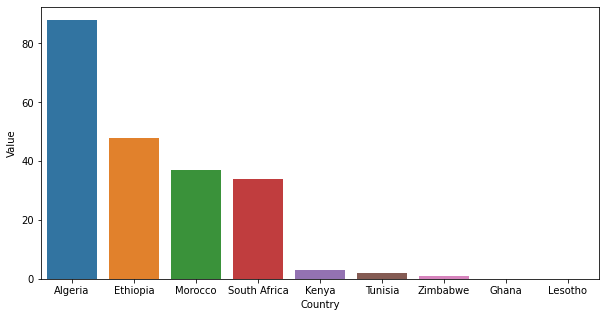

In [38]:
plt.figure(figsize=(10,5))
graph=sns.barplot(x='Country',y='Value',data= oats_highest)
#graph.set_title('Top 10 Category')
plt.show()

####  Q. What three countries have produced the highest total quantity of rice from 2004 to 2013?

In [39]:
rice_highest = africa_prod.loc[(africa_prod['Item'].str.startswith("Rice")) & (africa_prod['Year'].between(2004,2013))]
total_rice = rice_highest.groupby('Country')['Value'].sum().sort_values(ascending=False).head(3)
total_rice

Country
Egypt         40370
Nigeria       26964
Madagascar    26118
Name: Value, dtype: int64

#### Result: The top 3 countries that produced the highest total quantity of rice are Egypt, Nigeria, and Madagascar

In [98]:
# Top most producing country
highest_qty = africa_prod.groupby('Country')['Value'].agg(['sum']).reset_index().sort_values(by ='sum', ascending=False)
highest_producer = highest_qty.head(5) 
highest_producer

,Country,sum
31,Nigeria,1628030
12,Egypt,877498
36,South Africa,579592
13,Ethiopia,350693
42,United Republic of Tanzania,332802


### Result: Nigeria is the most producing country

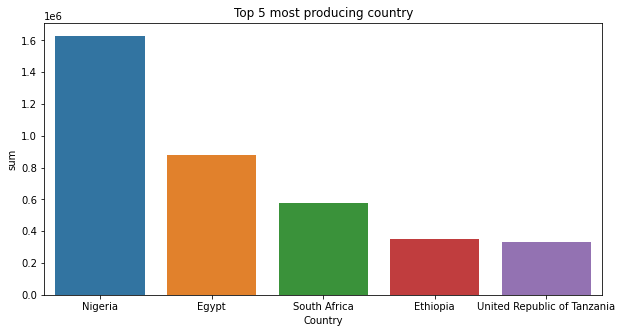

In [101]:
plt.figure(figsize=(10,5))
graph=sns.barplot(x='Country',y='sum',data=highest_producer)
graph.set_title('Top 5 most producing country')
plt.show()

### Q. Which country is the least producer?

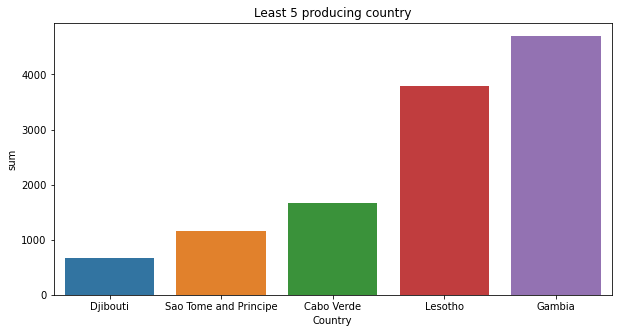

In [104]:
# Lowest producing country
lowest_qty = africa_prod.groupby('Country')['Value'].agg(['sum']).reset_index().sort_values(by ='sum', ascending=True)
lowest_producer = lowest_qty.head(5) 
plt.figure(figsize=(10,5))
graph=sns.barplot(x='Country',y='sum',data=lowest_producer)
graph.set_title('Least 5 producing country')
plt.show()


### Result: Djibouti is the least producing country

In [120]:
plt.savefig('lowest_producer.png')
plt.savefig('highest_producer.png')


<Figure size 432x288 with 0 Axes>